# Automoderator Pilot Metrics - Turkish Wikipedia

Task: [T362610](https://phabricator.wikimedia.org/T362610)

**[View on Jupyter Notebook Viewer](https://nbviewer.org/urls/gitlab.wikimedia.org/kcvelaga/automoderator-measurement/-/raw/main/pilot_analysis/trwiki_activity.ipynb?flush_cache=true)**

## Report

* **Last updated:** ~8:00 am UTC on 19 August 2024
* **Period:** 25 June to 18 August 2024

### Introduction

[Automoderator](https://www.mediawiki.org/wiki/Moderator_Tools/Automoderator) is project by the [Moderator Tools](https://www.mediawiki.org/wiki/Special:MyLanguage/Moderator_Tools) team, that enables moderators to configure automated reversion of bad edits based on scoring from a machine learning model. It has been enabled on it's first pilot wiki, Turkish Wikipedia, since 26 June 2024. This notebook is intended to serve as monitoring tool for Automoderator's activity during the pilot phase. Eventually, as it gets deployed to more wikis, we will move to a permanent dashboard on Superset ([a mockup based on testwiki activity](https://superset.wmcloud.org/superset/dashboard/37/)). 

This notebook will be updated weekly on Monday at around ~9 am UTC, or on ad-hoc basis as needed. If you have any feedback or questions, please post them to [Automoderator's talk page](https://www.mediawiki.org/wiki/Talk:Moderator_Tools/Automoderator).

In [22]:
wmf.utils.insert_code_toggle()

### Summary

**Reverts by Automoderator**
* From 26 June to 28 July 2024, Automoderator has made 46 reverts (at an average of 2 reverts/day, and 1 revert on most days).
* 90% of the edits reverted by Automoderator were made by anonymous users, and about 5% by newcomers (users with less than 50 edits and account age less than 30 days).
* Of the 2 edits that Automoderator reverted that belonged to registered users, the users belonged to 6-99 edit count bucket.
* The average duration for Automoderator to revert an edit is less than 3 seconds.

**Reverted Automoderator's Reverts**
* 17% (7 of 36) of Automoderator\'s reverts were reverted back.
    * of which 71% (5 reverts) were reverted back by same user whose edit was initially reverted.
    * of which 100% of the edits were from anonymous users.
* On average, the time taken to revert Automoderator's revert is:
    * in cases where it was reverted by the same users whose edit was initially reverted: 147 seconds (5 reverts)
    * in cases where it was reverted by another user: 23 hours (2 reverts)
* Potential False Positive Rate: 4%
    * not considering reverts by same anonymous user whose edit was initially reverted

**Overall Revert Activity**
* On average, during the last three weeks since deployment, Automoderator handled about ~0.33% of the overall revert activity on the wiki.

### Full report

**Note**: These cells need to be run _after_ all the data gathering cells have been run.

#### Reverts made by Automoderator

In [24]:
print(f'{prc.BOLD}Total reverts made by Automoderator for the given time period:{prc.ENDC} {reverts.shape[0]}')

Total reverts made by Automoderator for the given time period: 67


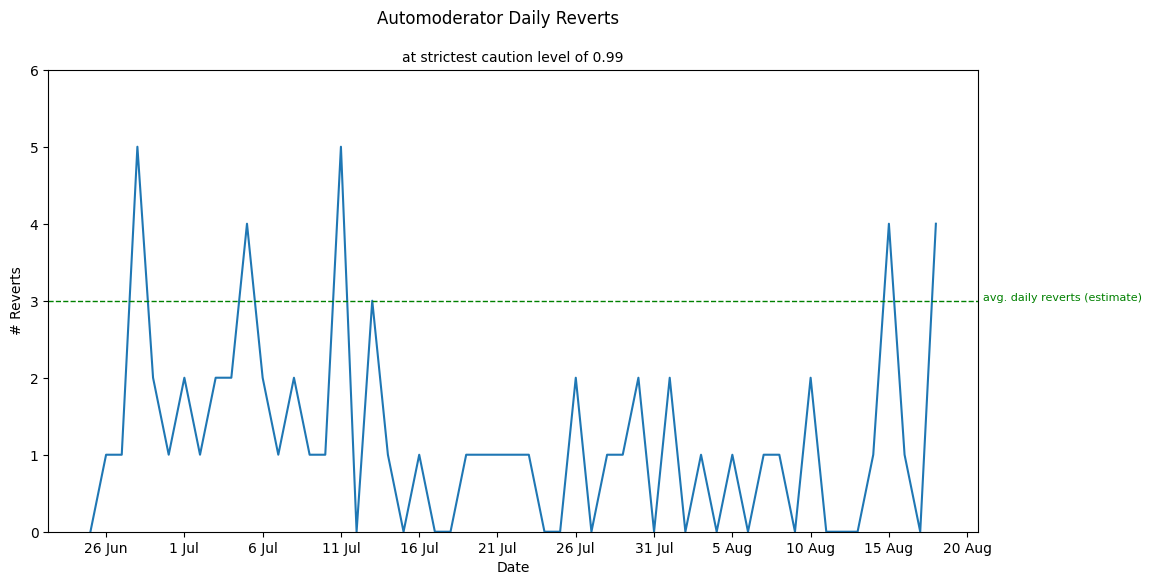

In [29]:
am_daily_lineplt()

In [30]:
print('Note:\n\
    - anonymous: unregistered users\n\
    - newcomers: users with less 50 edits and account age is less 30 days at the time of the edit\n\
    - misc: rest of users who aren\'t anonymous or newcomers'
)
display_html(gt_on_left(revr_user_proportions_tbl), raw=True)
display_html(gt_on_left(revr_user_edit_bucket_tbl), raw=True)

Note:
    - anonymous: unregistered users
    - newcomers: users with less 50 edits and account age is less 30 days at the time of the edit
    - misc: rest of users who aren't anonymous or newcomers


Proportion of Users by User Type 
 
 
 Whose Edit Was Reverted by Automoderator 
 
 
 
 User Type 
 Count 
 Percentage 
 
 
 
 anonymous 
 59 
 88% 
 
 
 misc 
 5 
 7% 
 
 
 newcomer 
 3 
 4%

Proportion of Users by Edit Bucket 
 
 
 Whose Edit Was Reverted by Automoderator 
 
 
 
 Edit Count Bucket 
 Count 
 Percentage 
 
 
 
 6-99 
 4 
 50% 
 
 
 1-5 
 4 
 50%

In [31]:
print(f'{prc.BOLD}Automoderator time to revert (mean):{prc.ENDC} {round(amr_ttr_secs, 2)} seconds.')

Automoderator time to revert (mean): 2.69 seconds.


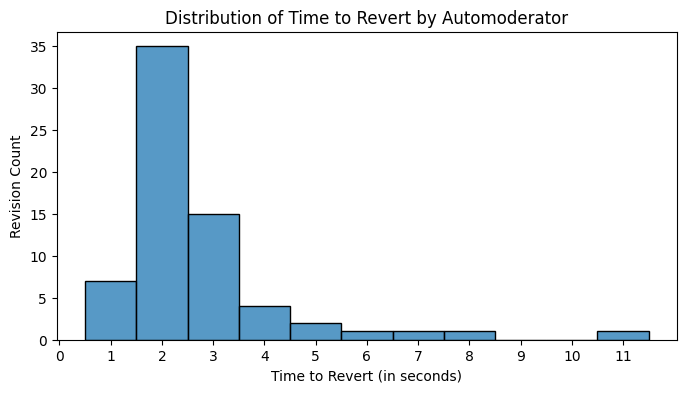

In [32]:
amr_ttr_hist()

#### Reverted Automoderator Reverts

In [33]:
print(f'{prc.BOLD}Percentage of Automoderator\'s Reverts Reverted Back:{prc.ENDC} {round(amr_is_reverted_pct)}% of {reverts.shape[0]} reverts (i.e. {reverted_amr.shape[0]} reverts).')
print(f'{prc.BOLD}- proportion of which were reverted back by same user whose edit was initially reverted:{prc.ENDC} {round(revam_same_user_pct)}% ({revam_same_user_revs.shape[0]} reverts).')
print(f'{prc.BOLD}- proportion of which were from anonymous users:{prc.ENDC} {round(revam_same_user_anon_pct)}%.')

Percentage of Automoderator's Reverts Reverted Back: 19% of 67 reverts (i.e. 13 reverts).
- proportion of which were reverted back by same user whose edit was initially reverted: 62% (8 reverts).
- proportion of which were from anonymous users: 100%.


In [34]:
display_html(gt_on_left(revam_user_type_tbl), raw=True)

Proportion of Users by User Type 
 
 
 Who Reverted by Automoderator's Revert 
 
 
 
 User Type 
 Count 
 Percentage 
 
 
 
 anonymous 
 8 
 62% 
 
 
 misc 
 4 
 31% 
 
 
 newcomer 
 1 
 8%

In [35]:
print(f'{prc.BOLD}Average time (in seconds) for Automoderator\'s to be reverted{prc.ENDC}\n\
    - by the same user whose edit was initially reverted: {int(revam_same_user_ttr)} secs\n\
    - by another user: {int(round(revam_other_user_ttr/3600))} hours'
)

Average time (in seconds) for Automoderator's to be reverted
    - by the same user whose edit was initially reverted: 9507 secs
    - by another user: 115 hours


In [36]:
print(f'{prc.BOLD}Potential False Positive rate of Automoderator:{prc.ENDC} {potential_fp_pct}%')

Potential False Positive rate of Automoderator: 7.46%


#### Overview of overall revert activity

In [32]:
print(f'{prc.BOLD}Average weekly revert proportion by Automoderator:{prc.ENDC} {round(am_mean_weekly_revert_proportion, 2)}%')

Average weekly revert proportion by Automoderator: 0.35%


In [33]:
display_html(gt_on_left(weekly_reverts_tbl), raw=True)

Overall Revert Activity 
 
 
 
 Week of 
 Revert Count 
 
 Percentage of Reverts 
 
 
 
 by Users 
 by Automoderator 
 
 
 
 3 June 
 6,666 
 100.00% 
 0.00% 
 
 
 10 June 
 7,171 
 100.00% 
 0.00% 
 
 
 17 June 
 6,793 
 100.00% 
 0.00% 
 
 
 24 June 
 4,571 
 99.78% 
 0.22% 
 
 
 1 July 
 3,897 
 99.64% 
 0.36% 
 
 
 8 July 
 2,953 
 99.56% 
 0.44% 
 
 
 15 July 
 1,802 
 99.78% 
 0.22% 
 
 
 22 July 
 1,219 
 99.59% 
 0.41% 
 
 
 29 July 
 985 
 99.39% 
 0.61% 
 
 
 5 August 
 2,244 
 99.78% 
 0.22% 
 
 
 
 
 
 Automoderator has been been enabled on 26 June 2024

## Data-Gathering

### Setup

Additional dependencies that need to be installed:

```
conda install great_tables matplotlib seaborn
```

In [2]:
import pandas as pd
import numpy as np
import datetime

import wmfdata as wmf

import great_tables as gt
from IPython.display import display_html

import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.ticker as ticker
import seaborn as sns

from warnings import filterwarnings
import importlib

pd.options.display.max_columns = None

In [3]:
def ig_warn(): 
    filterwarnings('ignore')
    
def col_pct(df, col):
    return df[col] / df[col].sum()

def gt_on_left(tbl):
    return f"""
    <div style="float: left; margin-right: 5px;">
        {tbl.as_raw_html()}
    </div>
    """

# from https://stackoverflow.com/questions/287871/how-do-i-print-colored-text-to-the-terminal
class prc:
    HEADER = '\033[95m'
    OKBLUE = '\033[94m'
    OKCYAN = '\033[96m'
    OKGREEN = '\033[92m'
    WARNING = '\033[93m'
    FAIL = '\033[91m'
    ENDC = '\033[0m'
    BOLD = '\033[1m'
    UNDERLINE = '\033[4m'

In [4]:
wiki_db = 'trwiki'
wiki_en_name = 'Turkish Wikipedia'
am_username = 'Otomoderatör'

### query

In [5]:
start_dt = '2024-06-25'
end_dt = datetime.date.today() - datetime.timedelta(1)
print(f'{prc.BOLD}start:{prc.ENDC} {start_dt}\n{prc.BOLD}end:{prc.ENDC} {end_dt}')

start: 2024-06-25
end: 2024-08-18


In [6]:
%%time

ig_warn()

# https://gitlab.wikimedia.org/kcvelaga/automoderator-measurement/-/blob/main/pilot_analysis/queries/automod_reverts_info.sql
with open('queries/automod_reverts_info.sql', 'r') as file:
    automod_reverts_query = file.read()
    
reverts = wmf.mariadb.run(
    automod_reverts_query
    .format(
        am_username=am_username, 
        start_dt=start_dt, 
        end_dt=end_dt
    ), dbs=wiki_db
)

CPU times: user 210 ms, sys: 16.6 ms, total: 227 ms
Wall time: 1min 23s


In [8]:
%%time

ig_warn()

# https://gitlab.wikimedia.org/kcvelaga/automoderator-measurement/-/blob/main/pilot_analysis/queries/overall_revert_activity.sql
with open('queries/overall_revert_activity.sql', 'r') as file:
    overall_reverts_query = file.read()
    
revert_activity = wmf.mariadb.run(
    overall_reverts_query
    .format(
        am_username=am_username, 
        start_dt='2024-06-03', 
        end_dt=end_dt
    ), dbs=wiki_db, date_col=['rev_dt']
)

CPU times: user 11.3 ms, sys: 0 ns, total: 11.3 ms
Wall time: 1.78 s


## Analysis

### reverts by AM

In [9]:
date_range = pd.date_range(start=start_dt, end=end_dt)
daily_reverts = pd.DataFrame(date_range, columns=['amr_rev_dt'])

In [10]:
daily_reverts['am_reverts_count'] = (
    daily_reverts['amr_rev_dt']
    .map(
        reverts
        .groupby('amr_rev_dt')
        .agg(am_reverts_count=('amr_rev_id', 'count'))
        .to_dict()['am_reverts_count']
    )
    .fillna(0)
)

In [28]:
def am_daily_lineplt():
    
    fig, ax = plt.subplots(figsize=(12, 6))
    sns.lineplot(data=daily_reverts, x='amr_rev_dt', y='am_reverts_count', ax=ax)

    ax.xaxis.set_major_locator(mdates.DayLocator(interval=5))
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%-d %b'))
    ax.yaxis.set_major_locator(ticker.MultipleLocator(1))

    ax.set_ylim(0, daily_reverts['am_reverts_count'].max() + 1)

    fig.suptitle(f'Automoderator Daily Reverts')
    ax.set_title(f'at strictest caution level of 0.99', fontsize=10)
    ax.set_xlabel('Date')
    ax.set_ylabel('# Reverts')

    ax.axhline(y=3, color='g', linestyle='--', linewidth=1)
    ax.text(daily_reverts['amr_rev_dt'].max() + datetime.timedelta(days=3), 3, 'avg. daily reverts (estimate)', color='g', fontsize=8)

    fig.show()

In [12]:
revr_user_proportions = reverts.revr_user_type.value_counts().reset_index()
revr_user_proportions['pct'] = col_pct(revr_user_proportions, 'count')

In [13]:
revr_user_proportions_tbl = (
    gt
    .GT(revr_user_proportions)
    .tab_header('Proportion of Users by User Type', 'Whose Edit Was Reverted by Automoderator')
    .fmt_percent('pct', decimals=0)
    .cols_label(
        revr_user_type='User Type',
        count='Count',
        pct='Percentage'
    )    
    .opt_stylize(5)
)

In [14]:
revr_user_edit_bucket = reverts.revr_user_edit_bucket.value_counts().reset_index()
revr_user_edit_bucket['pct'] = col_pct(revr_user_edit_bucket, 'count')

revr_user_edit_bucket_tbl = (
    gt
    .GT(revr_user_edit_bucket)
    .tab_header('Proportion of Users by Edit Bucket', 'Whose Edit Was Reverted by Automoderator')
    .fmt_percent('pct', decimals=0)
    .cols_label(
        revr_user_edit_bucket='Edit Count Bucket',
        count='Count',
        pct='Percentage'
    )    
    .opt_stylize(5)
)

In [15]:
amr_ttr_secs = reverts.amr_time_to_revert_secs.mean()

In [16]:
def amr_ttr_hist():
    
    plt.figure(figsize=(8, 4))

    sns.histplot(reverts.amr_time_to_revert_secs, discrete=True)

    plt.xticks(range(0, int(reverts.amr_time_to_revert_secs.max()) + 1))

    plt.xlabel('Time to Revert (in seconds)')
    plt.ylabel('Revision Count')

    plt.title(f'Distribution of Time to Revert by Automoderator')

    plt.show()

### Reverted AM reverts

In [17]:
amr_is_reverted_pct = (reverts.amr_is_reverted.value_counts()[1] / reverts.shape[0]) * 100

In [18]:
reverted_amr = reverts.query("""amr_is_reverted == 1""")

revam_user_type = reverted_amr.revam_user_type.value_counts().reset_index()
revam_user_type['pct'] = col_pct(revam_user_type, 'count')

revam_user_type_tbl = (
    gt
    .GT(revam_user_type)
    .tab_header('Proportion of Users by User Type', 'Who Reverted by Automoderator\'s Revert')
    .fmt_percent('pct', decimals=0)
    .cols_label(
        revam_user_type='User Type',
        count='Count',
        pct='Percentage'
    )    
    .opt_stylize(5)
)

In [19]:
revam_same_user_revs = reverted_amr.query("""revam_actor_id == revr_actor_id""")
revam_same_user_pct = revam_same_user_revs.shape[0]/reverted_amr.shape[0] * 100
revam_same_user_type = revam_same_user_revs.revam_user_type.value_counts
revam_same_user_anon_pct = revam_same_user_revs.revam_user_type.value_counts()['anonymous'] / revam_same_user_revs.shape[0] * 100

In [20]:
revam_same_user_ttr = reverted_amr.query("""revam_actor_id == revr_actor_id""").revam_time_to_revert_secs.mean()
revam_other_user_ttr = reverted_amr.query("""revam_actor_id != revr_actor_id""").revam_time_to_revert_secs.mean()

In [21]:
potential_fp_pct = round(reverted_amr.query("""revam_actor_id != revr_actor_id""").shape[0] / reverts.shape[0] * 100, 2)

### Overall revert activity

In [22]:
weekly_reverts = revert_activity.copy()

weekly_reverts = weekly_reverts.assign(
    week=lambda df: df['rev_dt'].dt.to_period('W').apply(lambda r: r.start_time)
)

weekly_reverts = weekly_reverts.drop('rev_dt', axis=1).groupby('week').sum()

weekly_reverts = weekly_reverts.assign(
    am_reverts_pct=lambda df: df['automod_reverts'] / df['all_reverts'],
    user_reverts_pct=lambda df: df['user_reverts'] / df['all_reverts'],
    anon_reverts_pct=lambda df: df['anon_reverts'] / df['all_reverts']
).reset_index()

am_mean_weekly_revert_proportion = weekly_reverts.query("""week >= '2024-06-24'""").am_reverts_pct.mean() * 100

In [23]:
weekly_reverts_tbl = (
    gt
    .GT(
        weekly_reverts[['week', 'all_reverts', 'user_reverts_pct', 'am_reverts_pct']]
    )
    .tab_header('Overall Revert Activity')
    .fmt_number(
        'all_reverts', 
        decimals=0
    )
    .fmt_percent(['user_reverts_pct', 'am_reverts_pct'], decimals=2)
    .fmt_date('week', date_style='day_month')
    .tab_spanner('Percentage of Reverts', ['user_reverts_pct', 'am_reverts_pct'])
    .tab_style(
        style=gt.style.text(weight='bold'),
        locations=gt.loc.body(columns=['week'], rows=[int(weekly_reverts.query("""week == '2024-06-24'""").index.values[0])])
    )
    .tab_style(
        style=gt.style.borders('top'),
        locations=gt.loc.body(rows=[int(weekly_reverts.query("""week == '2024-06-24'""").index.values[0])])
    )
    .data_color('am_reverts_pct', palette='YlGn')
    .cols_label(
        week='Week of',
        all_reverts='Revert Count',
        user_reverts_pct='by Users',
        am_reverts_pct='by Automoderator'
    )
    .opt_stylize(5)
    .tab_source_note('Automoderator has been  been enabled on 26 June 2024')
)